# Coupled Model

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [9]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)
from IPython.display import Latex

In [10]:
import os
import matplotlib.pyplot as plt

In [11]:
from src.configs.load_config import load_config

In [12]:
from src.models.model_setup import ModelSetup
from src.constants import TEST_DIREC

In [13]:
cfg = load_config(test=False)
setup = ModelSetup(str(TEST_DIREC))

In [125]:
from src.models.ocean import Ocean
from src.models.atmos import Atmos
from src.models.coupling import Coupling

In [15]:
os.listdir(setup.ocean_data_path)

['dQdf-sample.nc',
 'dQdT-sample.nc',
 'om_mask.nc',
 'qflx-0.nc',
 'qflx.nc',
 'qflx-test.nc',
 'rzk.pro',
 'spline_ECMWF.txt',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'tau-ECMWF.x',
 'tau-ECMWF.y']

In [16]:
os.listdir(setup.ocean_output_path)

['om_diag.nc',
 'om_test.save',
 'om_spin.save',
 'om_spin.nc',
 'om_spin.20y.restart',
 'om_diag.save',
 'om_diag.2y.restart',
 'om_run2f.save',
 'om_run2f.nc']

. For coupling, the drag coefficient, cD—used to convert modelled winds into stresses to force the ocean component—is 2.25 × 10−3, which is about 50% larger than typical values, but was found necessary for a coupled response with approximately the observed amplitude.

In [17]:
os.listdir(setup.atmos_path)

['DATA',
 'tmp',
 'prTrend.png',
 'S90-H2000-Stab.eps',
 'S91-hq1800-prcp_land1.nc',
 'Q.nc',
 'dQ.nc',
 'Tsp4.eps']

In [18]:
os.listdir(setup.atmos_data_path)

['clt-ECMWF-clim60.nc',
 'mask-360x180.nc',
 'mask-360x181.nc',
 'pr-ECMWF-clim.nc',
 'pr-ECMWF-trend.nc',
 'ps-ECMWF-clim.nc',
 'rh-ECMWF-clim60.nc',
 'rh-fixed-clim60.nc',
 'sfcWind-ECMWF-clim60.nc',
 'sfcWind-ECMWF-clim.nc',
 'sst-ECMWF-clim.nc',
 'sst-ECMWF-trend.nc',
 'ts-ECMWF-clim60.nc',
 'ts-ECMWF-clim.nc',
 'ts-ECMWF-trend.nc']

In [126]:
coup = Coupling(cfg, setup)
coup.run()

editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_spin
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_diag
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_run2f
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_test 2.08995 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_spin -t om_spin.tios 378.05276 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_spin 4.53454 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
rm -rf output/om_spin.data output/om_spin.indx 0.19674 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
cp -f output/om_spin.save output/om_spin.20y.restart 0.13437 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_diag -t om_diag.tios 58.65716 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_diag 0.

PermissionError: [Errno 13] Permission denied: b'/home/users/sithom/seager19/src/test/test_direc/atmos/dQ.nc'

<Figure size 1102.36x681.297 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [64]:
import os
import xarray as xr
from src.xr_utils import open_dataset, open_dataarray, sel, can_coords
from src.plot_utils import add_units

In [39]:
xr.open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    dq_dt    (lat, lon) float32 ...
    dq_df    (lat, lon) float32 ...
    ALH      (lat, lon) float32 ...
    ALW      (lat, lon) float32 ...
    BLW      (lat, lon) float32 ...
    dTse     (lat, lon) float32 ...
    rh       (lat, lon) float32 ...
    Ub       (lat, lon) float32 ...
    Cb       (lat, lon) float32 ...
    Tsb      (lat, lon) float32 ...

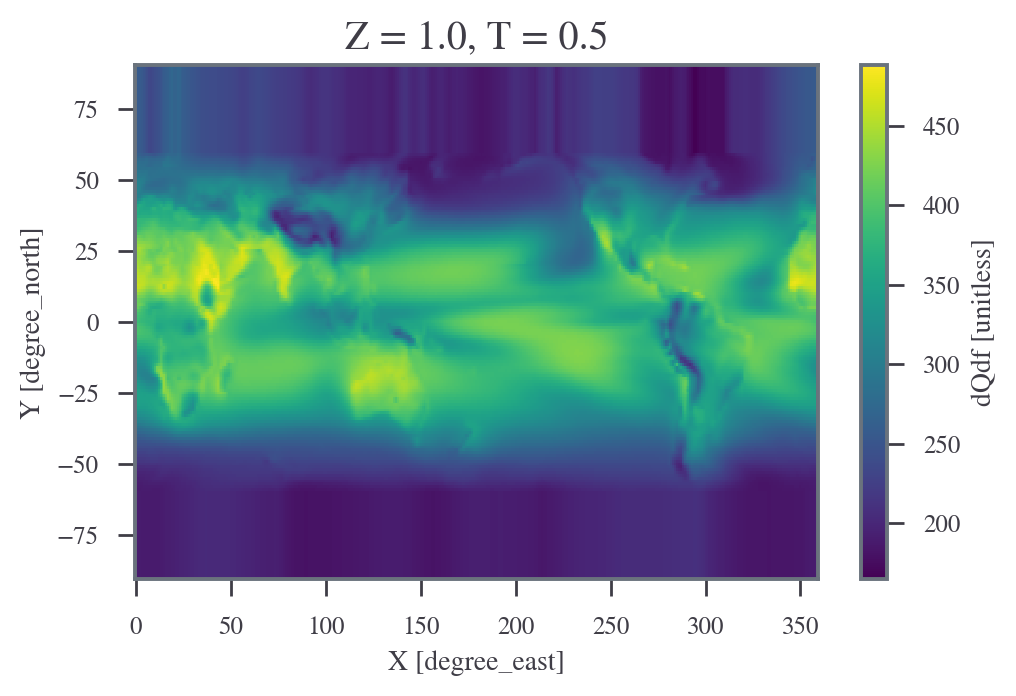

In [51]:
xr.open_dataarray(os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False).isel(T=0).plot()

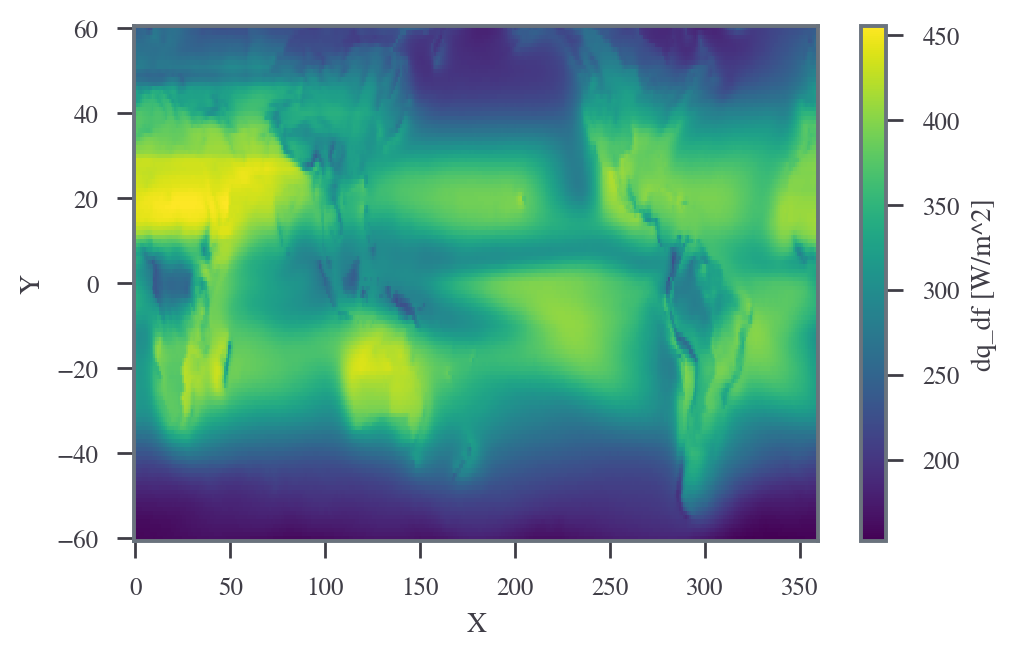

In [52]:
can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_df.plot()

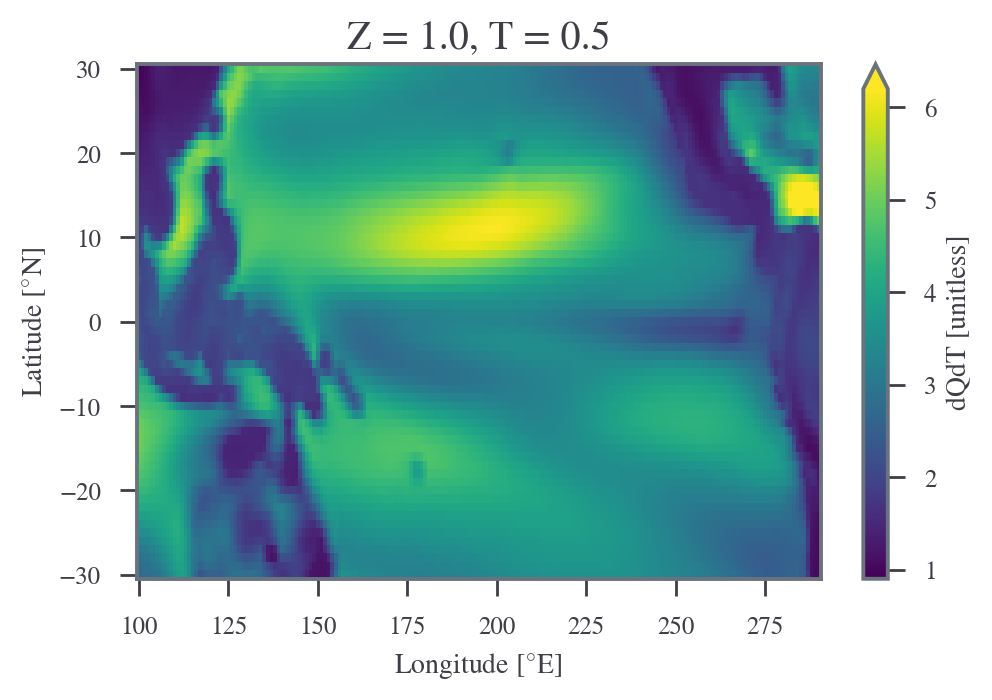

In [67]:
add_units(sel(xr.open_dataarray(
    os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
))).isel(T=0, Z=0).plot(vmin=0.9, vmax=6.2)

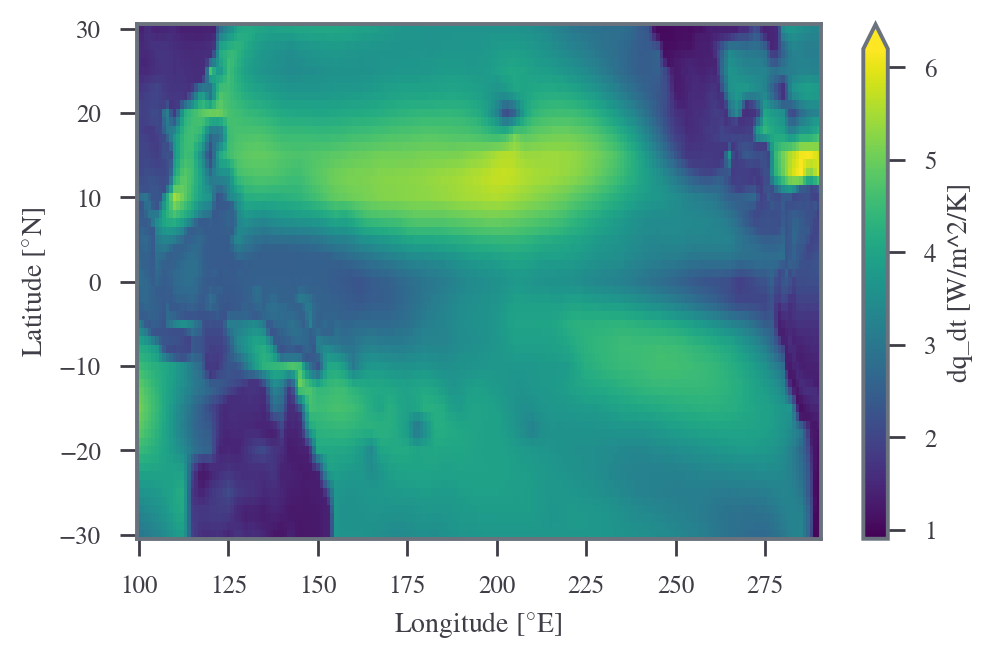

In [66]:
add_units(sel(can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_dt)).plot(
    vmin=0.9, vmax=6.2
)

## Look at variations during the year of dqdt-sample

In [70]:
import matplotlib.pyplot as plt

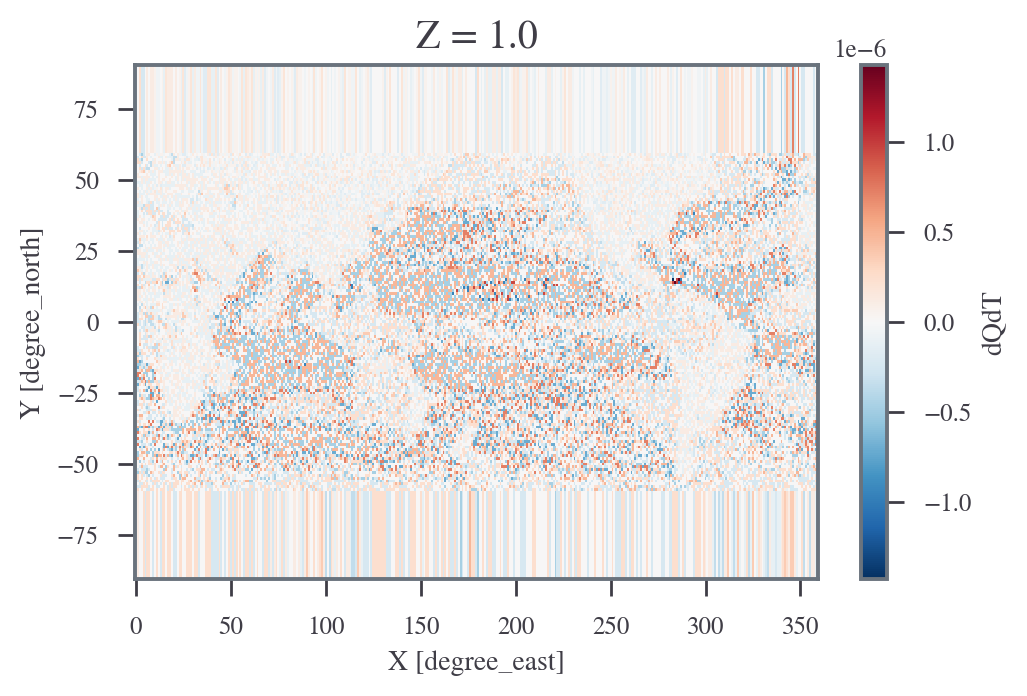

In [77]:
(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).isel(T=0).drop(["T", "Z"])
-
xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).mean("T")).plot()

In [78]:
import recursive_diff

In [83]:
for x in recursive_diff.recursive_diff(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).isel(T=0).isel(Z=0).drop(["T", "Z"]),
    xr.open_dataarray(
            os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
        ).mean("T").isel(Z=0).drop(["Z"]), rel_tol=1e-6):
    print(x)

[attrs]: Pair file_missing_value:-999 is in LHS only
[attrs]: Pair fnname:max is in LHS only
[attrs]: Pair long_name:dQdT is in LHS only
[attrs]: Pair longname:dQdT is in LHS only
[attrs]: Pair pointwidth:1.0 is in LHS only
[attrs]: Pair units:unitless is in LHS only


## Look at year of dQdf-sample

In [84]:
for x in recursive_diff.recursive_diff(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False
    ).isel(T=0).isel(Z=0).drop(["T", "Z"]),
    xr.open_dataarray(
            os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False
        ).mean("T").isel(Z=0).drop(["Z"]), rel_tol=1e-6):
    print(x)

[attrs]: Pair file_missing_value:-999 is in LHS only
[attrs]: Pair long_name:dQdf is in LHS only
[attrs]: Pair longname:dQdf is in LHS only
[attrs]: Pair pointwidth:1.0 is in LHS only
[attrs]: Pair units:unitless is in LHS only


In [85]:
dQdf_sample = xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False
    )

In [86]:
dQdf_new = dQdf_sample.copy()

In [101]:
dQdf_new

<xarray.DataArray 'dQdf' (T: 12, Z: 1, Y: 181, X: 360)>
[781920 values with dtype=float32]
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    file_missing_value:  -999
    pointwidth:          1.0
    units:               unitless
    long_name:           dQdf
    longname:            dQdf

In [88]:
dq_df_from_atm = open_dataset(os.path.join(setup.atmos_path, "dQ.nc")).dq_df

In [94]:
dQdf_new[0, 0, :, :]
# dq_df_from_atm.plot()

<xarray.DataArray 'dQdf' (Y: 181, X: 360)>
array([[189.03711, 188.9266 , 188.80602, ..., 188.47633, 188.80489, 188.93541],
       [189.03711, 188.9266 , 188.80602, ..., 188.47633, 188.80489, 188.93541],
       [189.03711, 188.9266 , 188.80602, ..., 188.47633, 188.80489, 188.93541],
       ...,
       [256.47128, 257.01053, 257.02246, ..., 254.786  , 255.52902, 256.0243 ],
       [256.47128, 257.01053, 257.02246, ..., 254.786  , 255.52902, 256.0243 ],
       [256.47128, 257.01053, 257.02246, ..., 254.786  , 255.52902, 256.0243 ]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    Z        float32 1.0
    T        float32 0.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    file_missing_value:  -999
    pointwidth:          1.0
    units:               unitless
    long_name:           dQdf
    longname:            dQdf

In [103]:
for t in range(12):
    dQdf_new[t, 0, 30:151, :] = can_coords(dq_df_from_atm)[:, :]

In [124]:
for x in recursive_diff.recursive_diff(
    dQdf_new.to_dataset(),
    xr.open_dataset(
        os.path.join(setup.ocean_data_path, "dQdf-sample.nc"),
        decode_times=False,
    ),
    rel_tol=0.5,
):
    print(x)